In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [2]:

file = ('crypto_data.csv')
df = pd.read_csv(file)

In [3]:
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [5]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the `IsTrading` column from the dataframe.

df = df.drop(df.index[df['IsTrading'] == False]).dropna()
df = df.drop(columns=['IsTrading'])
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [7]:
# Remove all rows that have at least one null value.
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 0 null values
Column TotalCoinSupply has 0 null values


In [8]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
df = df.loc[df["TotalCoinsMined"] >= 0]
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [9]:
# Create a new DataFrame that holds only the cryptocurrencies names.
coinNames = df['CoinName']
coinNames_df = pd.DataFrame(coinNames)
coinNames_df

,CoinName
0,42 Coin
2,404Coin
4,808
5,EliteCoin
7,Bitcoin
...,...
1238,ZEPHYR
1242,Gapcoin
1245,Beldex
1246,Horizen


In [10]:
df.drop(columns = ['CoinName'], inplace=True)
df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [11]:
df.set_index('Unnamed: 0')

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
808,SHA-256,PoW/PoS,0.000000e+00,0
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [12]:
# Your next step in data preparation is to convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data. 
# To accomplish this task, use Pandas to create dummy variables. Examine the number of rows and columns of your dataset now. How did they change?

df["TotalCoinSupply"] = df["TotalCoinSupply"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 1247
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       684 non-null    object 
 1   Algorithm        684 non-null    object 
 2   ProofType        684 non-null    object 
 3   TotalCoinsMined  684 non-null    float64
 4   TotalCoinSupply  684 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.1+ KB


In [13]:
df = df.drop(columns=['Unnamed: 0'])

In [14]:
df =pd.get_dummies(df, columns=["Algorithm", "ProofType"])
print(df.shape)
df.head()

(684, 107)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled

array([[-0.10312268, -0.03826639, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.07692584, -0.03826624, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.10312268, -0.03826639, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       ...,
       [-0.07878691, -0.03826599, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.10294153, -0.03826638, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394],
       [-0.10311949, -0.03826639, -0.03826394, ..., -0.03826394,
        -0.03826394, -0.03826394]])

In [16]:
df_scaled.shape

(684, 107)

In [18]:
# For this project, preserve 90% of the explained variance in dimensionality reduction. How did the number of the features change?
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(df_scaled)

In [19]:
df_crypto = pd.DataFrame(data = crypto_pca)
df_crypto.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,-0.226763,-1.247056,-0.443753,-1.367902e-10,4.660279e-11,-5.757560e-08,3.475559e-10,0.001952,-1.113359,-0.290471,...,1.500959e-13,5.252680e-13,3.682189e-13,-4.110960e-13,-6.355358e-13,2.223390e-14,6.747494e-13,1.311968e-12,-5.117698e-13,9.671108e-14
1,-0.212358,-1.245630,-0.444386,-1.367901e-10,4.660280e-11,-5.757561e-08,3.475558e-10,0.000574,-1.116438,-0.291084,...,1.503312e-13,5.245072e-13,3.684548e-13,-4.113509e-13,-6.352244e-13,2.240713e-14,6.740147e-13,1.311880e-12,-5.117845e-13,9.709970e-14
2,-0.156176,-0.829299,-0.273513,-1.011320e-10,3.445444e-11,-4.256572e-08,2.569543e-10,-0.009525,-0.627418,-0.092659,...,-1.966504e-15,6.263012e-15,-4.844679e-15,3.865614e-15,8.158429e-15,-1.096149e-14,1.025838e-14,1.223150e-14,-6.263478e-15,5.768203e-15
3,0.286000,-1.982529,-0.480747,-2.012354e-10,6.855790e-11,-8.469671e-08,5.112898e-10,-0.043232,-0.829931,-0.235206,...,-2.683951e-14,-1.322488e-14,-1.868723e-14,-9.548930e-15,-1.654700e-15,-2.069026e-14,3.088618e-14,3.910181e-14,1.167339e-14,4.521378e-14
4,-0.211787,1.470995,0.116681,8.028364e-11,-2.735171e-11,3.378895e-08,-2.039836e-10,-0.001314,0.063770,0.080055,...,-2.840444e-15,5.788103e-15,-4.748009e-15,2.369859e-15,6.687170e-15,-1.098324e-14,9.982295e-15,1.142270e-14,-4.864768e-15,5.751093e-15


In [20]:

pca.explained_variance_ratio_

array([0.02084017, 0.01964148, 0.01877419, 0.01871896, 0.01871896,
       0.01871896, 0.01871896, 0.01868399, 0.01667483, 0.01598467,
       0.01499161, 0.01480669, 0.01457271, 0.01414731, 0.0131193 ,
       0.01165688, 0.01161312, 0.01117436, 0.01078495, 0.0101309 ,
       0.00961458, 0.00959601, 0.00952498, 0.00950633, 0.0094893 ,
       0.0094691 , 0.00943499, 0.0094141 , 0.00941097, 0.00940461,
       0.00940077, 0.00940077, 0.00940077, 0.00939986, 0.00939301,
       0.00939193, 0.00938697, 0.00938697, 0.00938697, 0.00938272,
       0.00937974, 0.00937827, 0.00937613, 0.00937351, 0.0093732 ,
       0.00937261, 0.0093722 , 0.00936936, 0.00936732, 0.0093658 ,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935948,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935948,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935948,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935948,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935

In [21]:

crypto_pca.shape

(684, 83)

In [25]:
# Next, further reduce the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.

# Run t-SNE
tsne = TSNE(learning_rate = 250)
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

(684, 2)

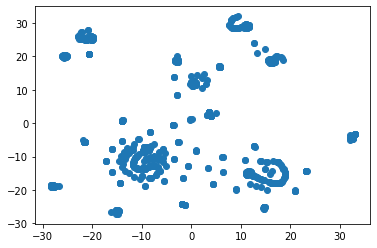

In [26]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

C:\Users\bmoya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


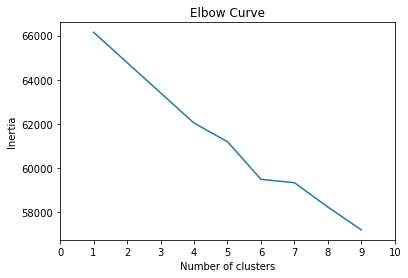

In [27]:
# Create an elbow plot to identify the best number of clusters
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

# Plot
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()